# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [ODS: Обучение без учителя: PCA и кластеризация](https://habrahabr.ru/company/ods/blog/325654/)
- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

## Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 элементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет используя pandas `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [2]:
%matplotlib inline
from skimage.io import imread
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
!ls
df = pd.read_csv('data/checkins.csv.gz', compression='gzip')

adult.csv.gz
data
Homework_1.ipynb
titanic_train.csv
week04_homework_04-01-clustering-homework.ipynb
week04_workshop_04-01-clustering-workshop.ipynb
week05_workshop_05-01-clustering-workshop.ipynb
week06_workshop_06-01-linear-regression-homework.ipynb
week2_homework_02-01-homework-numpy.ipynb
week2_homework_02-02-homework-pandas.ipynb
week2_workshop_02-01-workshop-numpy.ipynb
week2_workshop_02-02-workshop-pandas.ipynb
week3_homework_03-01-visualisation-homework.ipynb
week3_workshop_03-01-visualisation-workshop.ipynb
Workshop_1.ipynb


In [81]:
print(df.size)
print(df.head(5))
df.describe()

300000
    latitude   longitude  cluster
0  38.895112  -77.036366        5
1  33.800745  -84.410520        7
2  45.523452 -122.676207       30
3  40.764462 -111.904565       65
4  33.448377 -112.074037        1


,latitude,longitude,cluster
count,100000.000000,100000.000000,100000.000000
mean,36.886388,-89.396849,188.775390
std,8.351517,35.579317,423.581936
min,-45.031162,-159.670833,0.000000
25%,33.494170,-112.074037,4.000000
50%,38.646991,-87.743938,25.000000
75%,40.740389,-75.163789,150.000000
max,67.631479,174.908056,3230.000000


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [3]:
import sklearn.cluster as cl
clustering = cl.MeanShift(bandwidth=0.1).fit(df)

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

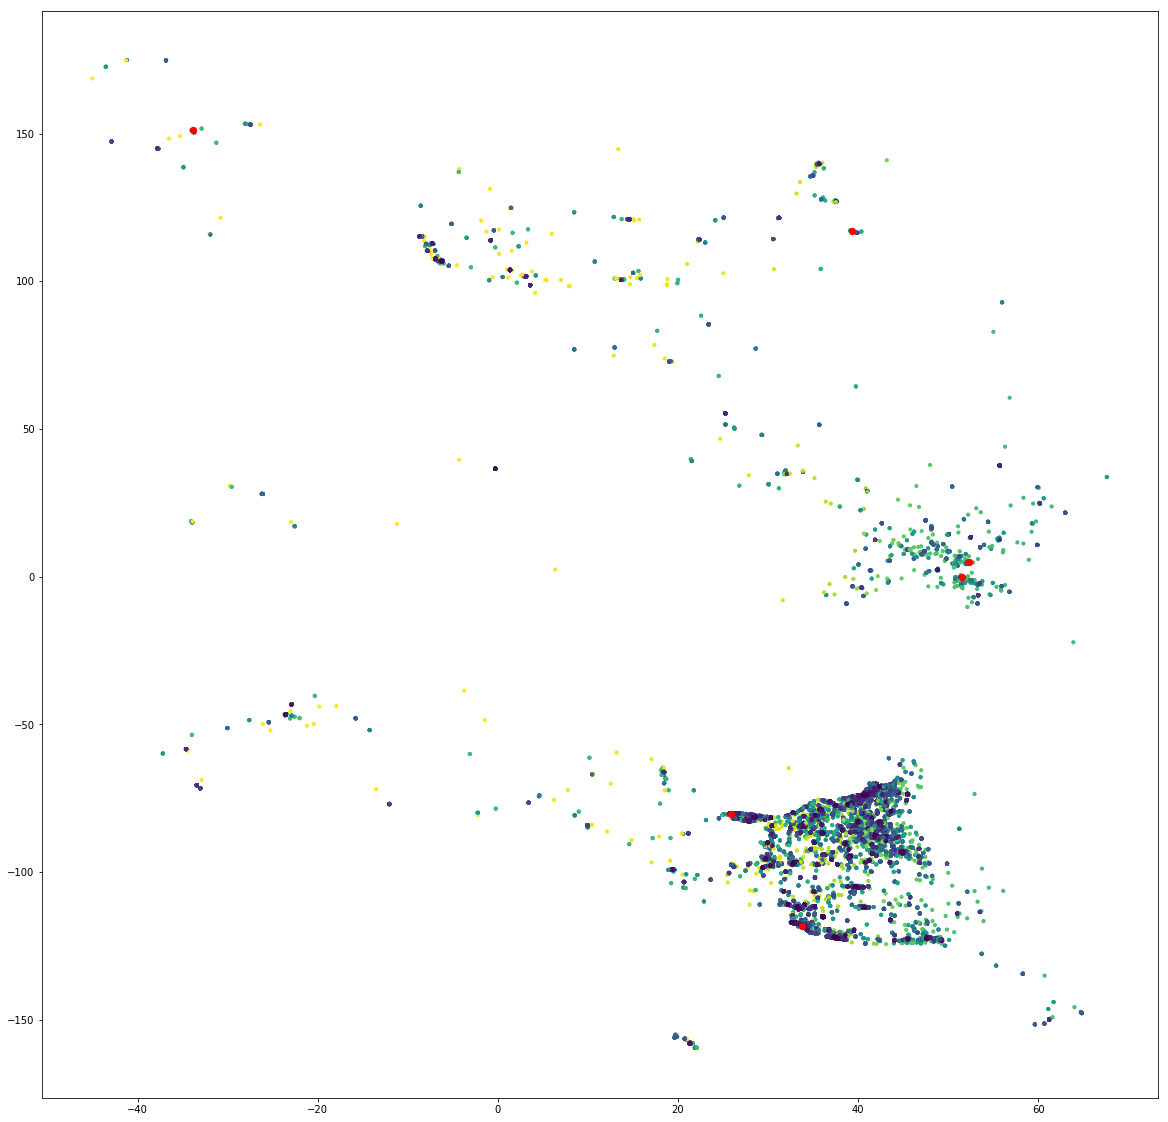

In [4]:
df2 = df
df2['cluster'] = clustering.labels_
offices = pd.DataFrame()
offices['latitude'] = [33.751277, 25.867736, 51.503016, 52.378894, 39.366487, -33.868457]
offices['longitude'] = [-118.188740, -80.324116, -0.075479, 4.885084, 117.036146, 151.205134]

plt.figure(figsize=(20,20))
plt.scatter(df2['latitude'], df2['longitude'], s = 10, c=df2['cluster'])
plt.scatter(offices['latitude'], offices['longitude'], s = 40,  c = 'r')

plt.show()
#df2.loc[df2['cluster']==2]
#plt.plot(df['latitude'], df['longitude'], 'ro')

###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [48]:
import operator as op
from itertools import groupby
groups = []
uniquekeys = []
data = df2.sort_values(by=['cluster'])
opt_clusters = np.empty([0, 2])


for key, group in groupby(data['cluster']):
    if (len(list(group)) > 15):
        opt_clusters = np.concatenate((opt_clusters, clustering.cluster_centers_[key].reshape(1, 2)))

np.size(opt_clusters,0)

592

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [74]:
import datetime
from geopy.distance import vincenty
#least_dists = np.zeros()
#=
#arr = np.zeros(6, np.size(opt_clusters,0))
least_dists = pd.DataFrame(0, index=np.arange(np.size(opt_clusters,0)), columns=np.arange(6))
dist_mins = pd.DataFrame()
for i in range(6):
    for j in range(np.size(opt_clusters,0)):
        p1 = (offices['latitude'][i], offices['longitude'][i])
        p2 = (opt_clusters[j][0], opt_clusters[j][1])
        least_dists.at[j, i] = vincenty(p1, p2).meters
dist_mins['dists'] = least_dists.min(axis = 1)
np.set_printoptions(formatter={'float_kind':lambda x: "%.9f" % x})
opt_clusters[dist_mins.nsmallest(20, 'dists').index]

array([[52.372963990, 4.892317223],
       [-33.860630429, 151.204775929],
       [25.845672264, -80.318890596],
       [51.502991261, -0.125537289],
       [33.809877955, -118.148923807],
       [25.785812420, -80.217938037],
       [25.705349721, -80.283428738],
       [33.888325343, -118.048928172],
       [26.010098249, -80.199990586],
       [33.872986012, -118.362091147],
       [33.972574821, -118.168370667],
       [33.817306434, -117.891249171],
       [26.138843787, -80.334346837],
       [33.983935874, -118.007404973],
       [33.674302660, -117.858789268],
       [26.120862659, -80.158906680],
       [34.060397555, -118.248709027],
       [26.200584641, -80.250716126],
       [34.035486953, -118.438997719],
       [33.650895993, -117.752073973]])

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 